In [197]:
import pandas as pd
import os
import seaborn as sns
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt

In [198]:
def printWilcoxonTestResults(df, measure):
    # Group the data by Generator
    generators = df['Generator'].unique()
    results = {}

    # Perform pairwise Wilcoxon signed-rank tests
    for i in range(len(generators)):
        for j in range(i + 1, len(generators)):
            gen1 = generators[i]
            gen2 = generators[j]
            time_gen1 = df[df['Generator'] == gen1][measure]
            time_gen2 = df[df['Generator'] == gen2][measure]
            
            # Perform the Wilcoxon signed-rank test
            stat, p = wilcoxon(time_gen1, time_gen2)
            results[f'{gen1} vs {gen2}'] = p

    # Print the results
    for comparison, p_value in results.items():
        print(f'{comparison}: p-value = {p_value}')

In [199]:
def printWilcoxonTestResultsByMutation(df, measure):
    # Group the data by Mutation
    mutations = df['Mutation'].unique()
    mutation_results = {}

    # Perform pairwise Wilcoxon signed-rank tests for each mutation
    for mutation in mutations:
        mutation_data = df[df['Mutation'] == mutation]
        generators = mutation_data['Generator'].unique()
        results = {}
        
        for i in range(len(generators)):
            for j in range(i + 1, len(generators)):
                gen1 = generators[i]
                gen2 = generators[j]
                time_gen1 = mutation_data[mutation_data['Generator'] == gen1][measure]
                time_gen2 = mutation_data[mutation_data['Generator'] == gen2][measure]
                
                # Perform the Wilcoxon signed-rank test
                stat, p = wilcoxon(time_gen1, time_gen2)
                results[f'{gen1} vs {gen2}'] = p
        
        mutation_results[mutation] = results

    # Print the results
    for mutation, results in mutation_results.items():
        print(f'Mutation: {mutation}')
        for comparison, p_value in results.items():
            print(f'  {comparison}: p-value = {p_value}')
        print()

In [200]:
# Load in a Pandas dataframe the JSSExperiments.txt file
df = pd.read_csv('JSSExperiments.txt', sep=',', header=0)

# Exclude all lines with ORIGINAL as Generator
df = df[df['Generator'] != 'ORIGINAL']

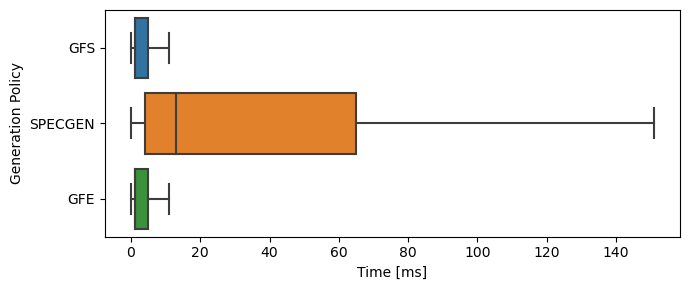

In [201]:
plt.figure(figsize=(7, 3))
sns.boxplot(x='Time', y='Generator', data=df, showfliers=False)
plt.ylabel('Generation Policy')
plt.xlabel('Time [ms]')
plt.tight_layout()
plt.savefig('Time.pdf')
plt.show()

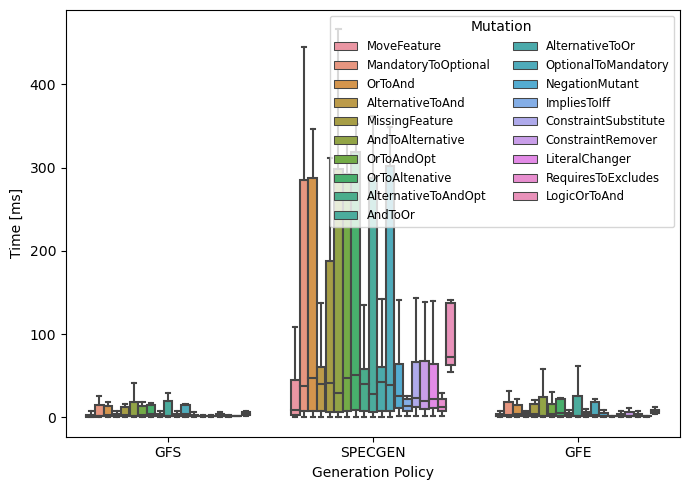

In [202]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Generator', y='Time', hue='Mutation', data=df, showfliers=False)
plt.xlabel('Generation Policy')
plt.ylabel('Time [ms]')
plt.legend(title='Mutation', loc='upper right', ncol=2, fontsize='small')
plt.tight_layout()
plt.savefig('TimePerMutation.pdf')
plt.show()

In [203]:
printWilcoxonTestResults(df, 'Time')

GFS vs SPECGEN: p-value = 0.0
GFS vs GFE: p-value = 1.475770425606466e-149
SPECGEN vs GFE: p-value = 0.0


In [204]:
printWilcoxonTestResultsByMutation(df, 'Time')

Mutation: MoveFeature
  GFS vs GFE: p-value = 1.6673721808763816e-77
  GFS vs SPECGEN: p-value = 0.0
  GFE vs SPECGEN: p-value = 0.0

Mutation: MandatoryToOptional
  SPECGEN vs GFE: p-value = 5.203557370702328e-239
  SPECGEN vs GFS: p-value = 3.1286978191305e-310
  GFE vs GFS: p-value = 8.896073918721466e-33

Mutation: OrToAnd
  GFE vs SPECGEN: p-value = 9.516694580356888e-39
  GFE vs GFS: p-value = 0.00016720545326838915
  SPECGEN vs GFS: p-value = 1.0378504610805514e-50

Mutation: AlternativeToAnd
  GFS vs SPECGEN: p-value = 1.9075669638309127e-52
  GFS vs GFE: p-value = 2.1918558668758643e-07
  SPECGEN vs GFE: p-value = 8.629683389005681e-53

Mutation: MissingFeature
  SPECGEN vs GFE: p-value = 1.430340063081944e-229
  SPECGEN vs GFS: p-value = 1.0126709104850262e-271
  GFE vs GFS: p-value = 2.062710019014923e-09

Mutation: AndToAlternative
  GFE vs SPECGEN: p-value = 2.3394099617408245e-137
  GFE vs GFS: p-value = 5.774593721207354e-15
  SPECGEN vs GFS: p-value = 3.9443423575609107

/Users/andrea/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


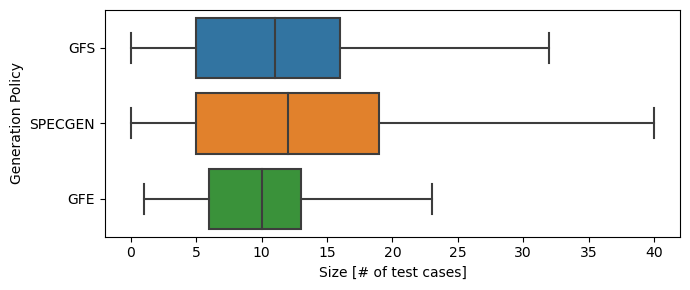

In [205]:
plt.figure(figsize=(7, 3))
sns.boxplot(y='Generator', x='Size', data=df, showfliers=False)
plt.ylabel('Generation Policy')
plt.xlabel('Size [# of test cases]')
plt.tight_layout()
plt.savefig('Size.pdf')
plt.show()

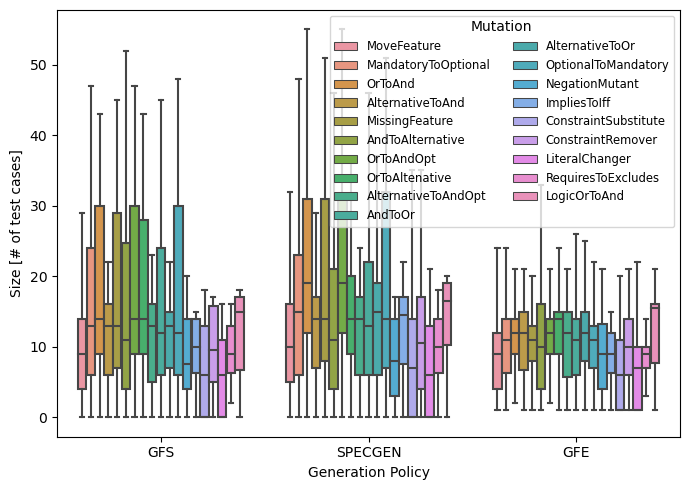

In [206]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Generator', y='Size', hue='Mutation', data=df, showfliers=False)
plt.xlabel('Generation Policy')
plt.ylabel('Size [# of test cases]')
plt.legend(title='Mutation', loc='upper right', ncol=2, fontsize='small')
plt.tight_layout()
plt.savefig('SizePerMutation.pdf')
plt.show()

In [207]:
printWilcoxonTestResults(df, 'Size')

GFS vs SPECGEN: p-value = 3.674758821984805e-185
GFS vs GFE: p-value = 0.0
SPECGEN vs GFE: p-value = 0.0


In [208]:
printWilcoxonTestResultsByMutation(df, 'Size')

Mutation: MoveFeature
  GFS vs GFE: p-value = 6.665052059287504e-231
  GFS vs SPECGEN: p-value = 3.217817356085178e-134
  GFE vs SPECGEN: p-value = 0.0

Mutation: MandatoryToOptional
  SPECGEN vs GFE: p-value = 8.30665267882443e-169
  SPECGEN vs GFS: p-value = 1.430794150907589e-14
  GFE vs GFS: p-value = 1.52361380688264e-106

Mutation: OrToAnd
  GFE vs SPECGEN: p-value = 1.7739185236133667e-51
  GFE vs GFS: p-value = 2.2928263480859715e-36
  SPECGEN vs GFS: p-value = 1.3115527290051487e-17

Mutation: AlternativeToAnd
  GFS vs SPECGEN: p-value = 4.960984083396579e-10
  GFS vs GFE: p-value = 0.3976874394917638
  SPECGEN vs GFE: p-value = 6.318165368352319e-08

Mutation: MissingFeature
  SPECGEN vs GFE: p-value = 4.043445721266402e-160
  SPECGEN vs GFS: p-value = 1.447470048959328e-07
  GFE vs GFS: p-value = 5.37023341675837e-150

Mutation: AndToAlternative
  GFE vs SPECGEN: p-value = 1.5205368704221432e-19
  GFE vs GFS: p-value = 1.829213803125287e-15
  SPECGEN vs GFS: p-value = 0.0668

/Users/andrea/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


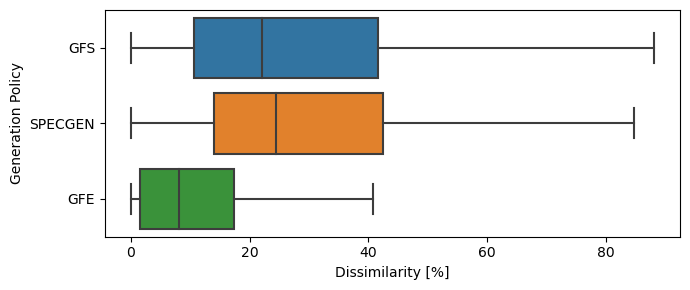

In [209]:
plt.figure(figsize=(7, 3))
sns.boxplot(y='Generator', x='Dissimilarity', data=df, showfliers=False)
plt.ylabel('Generation Policy')
plt.xlabel('Dissimilarity [%]')
plt.tight_layout()
plt.savefig('Dissimilarity.pdf')
plt.show()

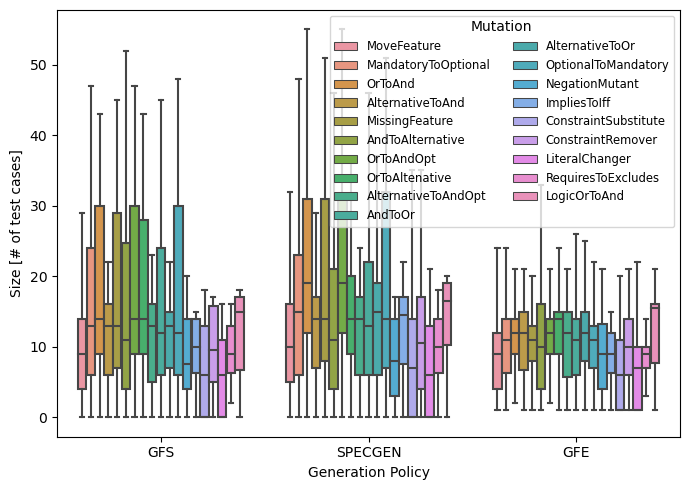

In [210]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Generator', y='Size', hue='Mutation', data=df, showfliers=False)
plt.xlabel('Generation Policy')
plt.ylabel('Size [# of test cases]')

# Set the legend to be placed below the plot with 3 columns
plt.legend(title='Mutation', loc='upper right', ncol=2, fontsize='small')
plt.tight_layout()
plt.savefig('DissimilarityPerMutation.pdf')
plt.show()

In [211]:
printWilcoxonTestResults(df, 'Dissimilarity')

GFS vs SPECGEN: p-value = 1.0273353531899724e-132
GFS vs GFE: p-value = 0.0
SPECGEN vs GFE: p-value = 0.0


In [212]:
printWilcoxonTestResultsByMutation(df, 'Dissimilarity')

Mutation: MoveFeature
  GFS vs GFE: p-value = 0.0
  GFS vs SPECGEN: p-value = 1.4645566209571552e-109
  GFE vs SPECGEN: p-value = 0.0

Mutation: MandatoryToOptional
  SPECGEN vs GFE: p-value = 1.7559507802564506e-214
  SPECGEN vs GFS: p-value = 2.9871602654186914e-27
  GFE vs GFS: p-value = 1.819330911334725e-158

Mutation: OrToAnd
  GFE vs SPECGEN: p-value = 5.2415192635178424e-55
  GFE vs GFS: p-value = 1.752166988570019e-47
  SPECGEN vs GFS: p-value = 6.093800372578578e-23

Mutation: AlternativeToAnd
  GFS vs SPECGEN: p-value = 6.0858212253008184e-15
  GFS vs GFE: p-value = 9.43837629829596e-19
  SPECGEN vs GFE: p-value = 1.4606588672215873e-23

Mutation: MissingFeature
  SPECGEN vs GFE: p-value = 2.0122804389739672e-202
  SPECGEN vs GFS: p-value = 0.2902084576778786
  GFE vs GFS: p-value = 7.45146670481973e-211

Mutation: AndToAlternative
  GFE vs SPECGEN: p-value = 8.443200212105895e-24
  GFE vs GFS: p-value = 3.807854117041365e-23
  SPECGEN vs GFS: p-value = 0.8172292485101045

M

/Users/andrea/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


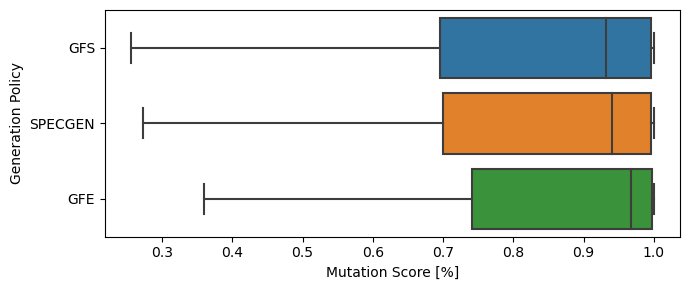

In [213]:
plt.figure(figsize=(7, 3))
sns.boxplot(y='Generator', x='MutationScore', data=df, showfliers=False)
plt.ylabel('Generation Policy')
plt.xlabel('Mutation Score [%]')
plt.tight_layout()
plt.savefig('MutationScore.pdf')
plt.show()

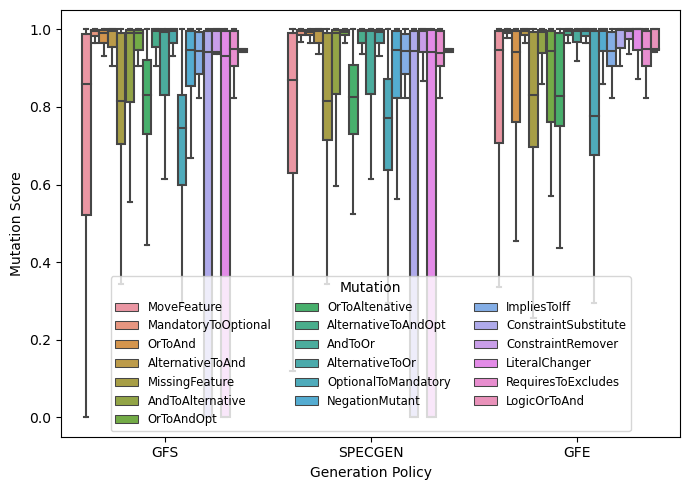

In [214]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Generator', y='MutationScore', hue='Mutation', data=df, showfliers=False)
plt.xlabel('Generation Policy')
plt.ylabel('Mutation Score')
plt.legend(title='Mutation', loc='lower center', ncol=3, fontsize='small')
plt.tight_layout()
plt.savefig('MutationScorePerMutation.pdf')
plt.show()

In [215]:
printWilcoxonTestResults(df, 'MutationScore')

GFS vs SPECGEN: p-value = 2.9986844358129993e-09
GFS vs GFE: p-value = 1.7601300010268504e-160
SPECGEN vs GFE: p-value = 1.631769313582674e-104


In [216]:
printWilcoxonTestResultsByMutation(df, 'MutationScore')

Mutation: MoveFeature
  GFS vs GFE: p-value = 7.403532538925682e-120
  GFS vs SPECGEN: p-value = 6.972711259167924e-06
  GFE vs SPECGEN: p-value = 6.7883492409424e-83

Mutation: MandatoryToOptional
  SPECGEN vs GFE: p-value = 1.836613324784586e-14
  SPECGEN vs GFS: p-value = 0.259372826400999
  GFE vs GFS: p-value = 9.515018715273923e-17

Mutation: OrToAnd
  GFE vs SPECGEN: p-value = 1.4003135346537017e-26
  GFE vs GFS: p-value = 3.658977039282122e-18
  SPECGEN vs GFS: p-value = 0.00014178086201925303

Mutation: AlternativeToAnd
  GFS vs SPECGEN: p-value = 0.33914458708568895
  GFS vs GFE: p-value = 0.019375876664951785
  SPECGEN vs GFE: p-value = 0.038947104999086365

Mutation: MissingFeature
  SPECGEN vs GFE: p-value = 0.006661011873698968
  SPECGEN vs GFS: p-value = 0.03604673259767083
  GFE vs GFS: p-value = 9.349720140186967e-05

Mutation: AndToAlternative
  GFE vs SPECGEN: p-value = 1.186258634483212e-10
  GFE vs GFS: p-value = 7.016949186216719e-13
  SPECGEN vs GFS: p-value = 0.

/Users/andrea/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
